 This assignment is analyzing 2015 LA County obesity prevalence in adults (percent population with BMI >30). The data is from the LA County Public Health Department, collected through the LA County 2015 Health Survey. There should be 86 unique values for each jurisdiction. What may make this data difficult to use is that it has percents in each column and it is an object (non-integer data). My goal is to eventually do a comparison of all the jurisdictions across LA County's percentage of adults with obesity.

In [406]:
import geopandas as gpd

In [407]:
# We want to import our csv data file
adultweight = gpd.read_file('Data/LA County_PercentObeseAdults2015.csv')

In [408]:
# How many rows and columns are in the dataset?
adultweight.shape

(98, 13)

In [409]:
# What does a sample of our data look like?
adultweight.head()
# This runs the first 5 rows of our dataset.

,field_1,field_2,field_3,field_4,field_5,field_6,field_7,field_8,field_9,field_10,field_11,field_12,geometry
0,,,,,,,,,,,,,None
1,,,,,,,,,,,,,None
2,City/Community,Percent,95% Confidence Interval2: Lower Limit,95% Confidence Interval: Upper Limit,,,,,,,,,None
3,Alhambra,14%,11%,17%,,,,,,,,,None
4,Altadena,24%,20%,30%,,,,,,,,,None


In [410]:
# What types of data do we have and what are each of the columns?
adultweight.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   field_1   98 non-null     object  
 1   field_2   98 non-null     object  
 2   field_3   98 non-null     object  
 3   field_4   98 non-null     object  
 4   field_5   98 non-null     object  
 5   field_6   98 non-null     object  
 6   field_7   98 non-null     object  
 7   field_8   98 non-null     object  
 8   field_9   98 non-null     object  
 9   field_10  98 non-null     object  
 10  field_11  98 non-null     object  
 11  field_12  98 non-null     object  
 12  geometry  0 non-null      geometry
dtypes: geometry(1), object(12)
memory usage: 10.1+ KB


In [411]:
# What are the unique values of one of the columns?
adultweight['field_1'].value_counts()
# We now know each of the jurisdictions in the dataset.

                                   10
La Mirada                           1
San Gabriel                         1
Los Angeles Council District  7     1
Monrovia                            1
                                   ..
Hawthorne                           1
Los Angeles Council District  8     1
West Covina                         1
Culver City                         1
Gardena                             1
Name: field_1, Length: 89, dtype: int64

In [412]:
# We only want to view the first 2 fields (jurisdiction and percentage)
adultweight[['field_1', 'field_2']]

,field_1,field_2
0,,
1,,
2,City/Community,Percent
3,Alhambra,14%
4,Altadena,24%
...,...,...
93,,
94,,
95,,
96,,


In [413]:
# Define our desired columns for us to trim the dataset to eliminate unnecessary columns)
desired_columns = ['field_1', 'field_2']
adultweight[desired_columns]

,field_1,field_2
0,,
1,,
2,City/Community,Percent
3,Alhambra,14%
4,Altadena,24%
...,...,...
93,,
94,,
95,,
96,,


In [414]:
adultweight_trimmed = adultweight[desired_columns].copy()
adultweight_trimmed
# Made a copy and saved the trimmed dataset.

,field_1,field_2
0,,
1,,
2,City/Community,Percent
3,Alhambra,14%
4,Altadena,24%
...,...,...
93,,
94,,
95,,
96,,


In [415]:
# We want to change the names of each column header
adultweight_trimmed.columns.to_list()
# Defines our selection so we can then change the headers

['field_1', 'field_2']

In [416]:
# Define the new headers
adultweight_trimmed.columns = ['jurisdiction', 'percentage']
# We now have updated the columns to reflect the new headers

In [417]:
# We would like to remove the rows with blank data
adultweight_trimmed = adultweight_trimmed.drop([0,1,2,90,91,92,93,94,95,96,97])
print(adultweight_trimmed)
# Blank rows have now been removed

                jurisdiction percentage
3                   Alhambra        14%
4                   Altadena        24%
5                    Arcadia         6%
6                      Azusa        26%
7               Baldwin Park        27%
..                       ...        ...
85            West Hollywood        22%
86  West Whittier-Los Nietos        36%
87                  Westmont        32%
88                  Whittier        28%
89        Los Angeles County        24%

[87 rows x 2 columns]


In [418]:
# What does the dataset currently look like?
adultweight_trimmed

,jurisdiction,percentage
3,Alhambra,14%
4,Altadena,24%
5,Arcadia,6%
6,Azusa,26%
7,Baldwin Park,27%
...,...,...
85,West Hollywood,22%
86,West Whittier-Los Nietos,36%
87,Westmont,32%
88,Whittier,28%


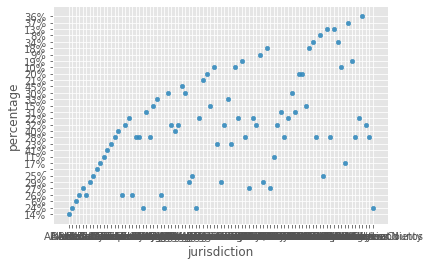

In [419]:
# How can we visualize this non-integer dataset?
adultweight_trimmed.plot.scatter(x="jurisdiction", y="percentage", alpha=0.9)
# A plot is not the best way, however we would need to convert from an object to integer data to further visualize.

In [421]:
# What does the dataset currently look like?
adultweight_trimmed

,jurisdiction,percentage
3,Alhambra,14%
4,Altadena,24%
5,Arcadia,6%
6,Azusa,26%
7,Baldwin Park,27%
...,...,...
85,West Hollywood,22%
86,West Whittier-Los Nietos,36%
87,Westmont,32%
88,Whittier,28%


In [420]:
# View the data without seeing the row containing LA County total percentage of obesity
adultweight_trimmed.query("jurisdiction != 'Los Angeles County'")
# Filters out the row with LA County total

,jurisdiction,percentage
3,Alhambra,14%
4,Altadena,24%
5,Arcadia,6%
6,Azusa,26%
7,Baldwin Park,27%
...,...,...
84,West Covina,28%
85,West Hollywood,22%
86,West Whittier-Los Nietos,36%
87,Westmont,32%
